In [173]:
import numpy as np

%matplotlib

from   matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d
 


Using matplotlib backend: module://matplotlib_inline.backend_inline


In [208]:
# Generate multi-dimensioned noisy data and add a correlated column.
samples, features, corr = 100, 2, 0.35

found = False
while not found:
    raw    = np.random.normal(0, 1, (samples, features))
    X      = np.concatenate((raw[:,0].reshape((samples,1)) ,  (corr * raw[:,0] + raw[:,1]).reshape(samples,1)), axis=1)
    a      = np.array([[5/6], [-0.225]])
    y      = np.matmul(X, a)

    X      = (X - np.mean(X, axis=0)) / np.std(X)
    y      = (y - np.mean(y, axis=0)) / np.std(y)

    ry2    = np.matmul(X.T,y)[1][0] / len(X)
    if abs(ry2) < 0.01: found = True




In [209]:
 np.matmul(X.T,y) / len(X)


array([[ 0.94766946],
       [-0.0015645 ]])

In [210]:
 np.matmul(X.T,X) / len(X)


array([[0.97182325, 0.2716501 ],
       [0.2716501 , 1.01160515]])

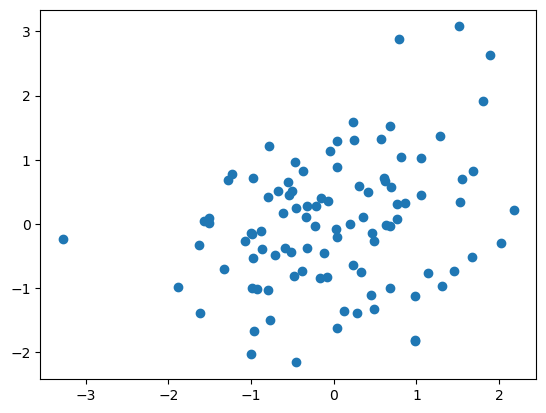

In [211]:
plt.scatter(X[:, 0], X[:, 1])

plt.show()

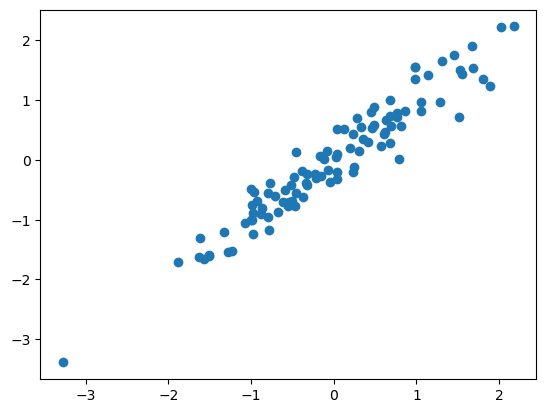

In [212]:
plt.scatter(X[:, 0], y)

plt.show()

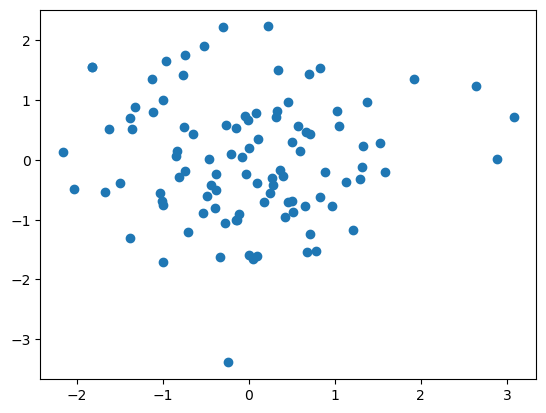

In [213]:
plt.scatter(X[:, 1], y)

plt.show()